In [ ]:
import pandas as pd
import os
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

         Product Name        Date  Price
0    iPhone 15 128 GB  28.07.2024  48899
2    iPhone 15 128 GB  29.07.2024  48899
3    iPhone 15 128 GB  30.07.2024  48839
4    iPhone 15 128 GB  31.07.2024  48829
5    iPhone 15 128 GB  01.08.2024  48829
..                ...         ...    ...
347  iPhone 15 128 GB  30.04.2025  50998
348  iPhone 15 128 GB  01.05.2025  50999
349  iPhone 15 128 GB  02.05.2025  51149
351  iPhone 15 128 GB  03.05.2025  46500
356  iPhone 15 128 GB  06.05.2025  50939

[268 rows x 3 columns]


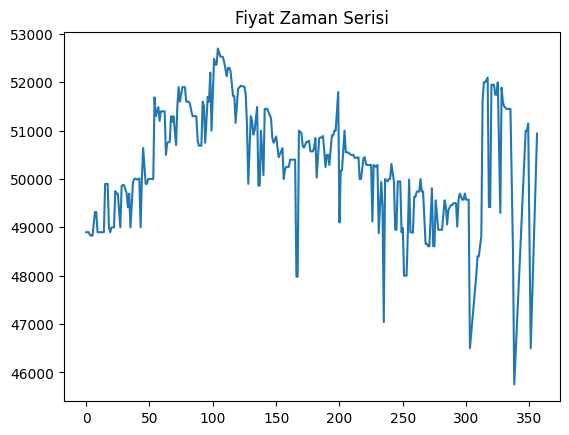

In [2]:
df = pd.read_csv(r"csv/akakce.csv")
df["Price"] = df["Price"].apply(lambda x: int(str(x).replace(" TL", "").split(",")[0].replace(".", "")))
df = df.drop_duplicates(subset=["Date"])
df['Price'].plot(title='Fiyat Zaman Serisi')
print(df)


In [3]:
model = ARIMA(df['Price'], order=(7, 2, 0))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\EXCALIBUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\EXCALIBUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\EXCALIBUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  268
Model:                 ARIMA(7, 2, 0)   Log Likelihood               -2282.076
Date:                Wed, 07 May 2025   AIC                           4580.153
Time:                        10:16:10   BIC                           4608.821
Sample:                             0   HQIC                          4591.670
                                - 268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4687      0.024    -19.609      0.000      -0.516      -0.422
ar.L2         -0.4347      0.035    -12.480      0.000      -0.503      -0.366
ar.L3         -0.3573      0.047     -7.636      0.0

c:\Users\EXCALIBUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\EXCALIBUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


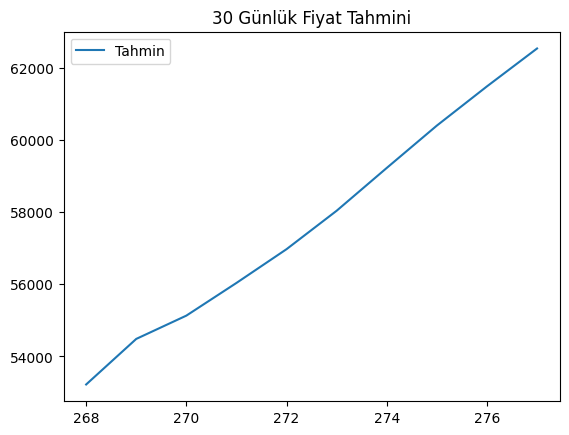

In [4]:
import matplotlib.pyplot as plt

forecast = model_fit.forecast(steps=10)
forecast.plot(label='Tahmin')
plt.legend()
plt.title("30 Günlük Fiyat Tahmini")
plt.show()


In [5]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Price'])  # Zaman serisi burada 'fiyat'
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.47485873619167
p-value: 0.12171190690754441


In [6]:
df['price_diff'] = df['Price'].diff().dropna()
df.dropna(subset=['price_diff'], inplace=True)
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['price_diff'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -6.53612534642687
p-value: 9.599047467891807e-09


c:\Users\EXCALIBUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\EXCALIBUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\EXCALIBUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\EXCALIBUR\AppData\Local\Programs\Pyth

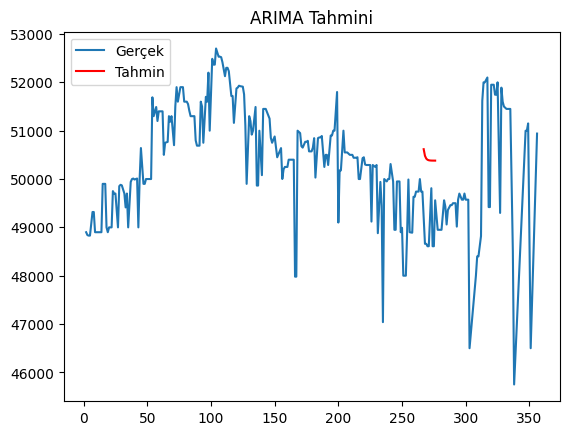

In [7]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Serin zaten varsa:
model = ARIMA(df['Price'], order=(1, 1, 1))  # Tahmini değerler
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)

plt.plot(df['Price'], label='Gerçek')
plt.plot(range(len(df), len(df)+10), forecast, label='Tahmin', color='red')
plt.title('ARIMA Tahmini')
plt.legend()
plt.show()
